In [132]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

## 서울시 일자별 코로나 확진자 수 공공데이터 가져오기

In [131]:
import requests
import json
import pandas as pd
import seaborn as sns #시각화 라이브러리
import matplotlib.pyplot as plt #그래프 스타일 설정

%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
plt.rc("axes", unicode_minus=False) #마이너스 폰트 깨지는 문제 대처
sns.set( font="AppleGothic")

import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

### Open API 사용하여 데이터 획득하기

공공데이터 데이터 셋: 
<a href='https://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do'> 서울시 코로나19 확진자 현황 </a>

### 발급 받은 key값 입력
오픈 API 사용 신청하면, 사용자마다 고유한 Key 값을 제공해준다.

In [2]:
my_key='4c49554a7a68616e38304c64556d49'

### endpoint 확인
- 오픈API 서비스되는 서버의 ip 혹은 domain 주소
- api활용 문서 확인해보면 endpoint 확인할 수 있는 코드 들어있으므로 복사해서 사용한다.
- datatype: xml 혹은 json 설정하여 받아오는데 최근에는 json 형식 많이 사용
- serviceKey에 위에 발급받은 key값 할당해준다.

- url 가져올때 샘플 url에 설명있음 -> 가져오고 싶은 범위 설정 가능 

In [28]:
endpoint=f"http://openapi.seoul.go.kr:8088/{my_key}/json/Corona19Status/1/1000/"

KEY: OpenAPI 발급된 키

TYPE: xml , xls , json 선택가능

In [29]:
print(endpoint)

http://openapi.seoul.go.kr:8088/4c49554a7a68616e38304c64556d49/json/Corona19Status/1/1000/


### Data 읽어오기

- for문 , pd.concat() 사용

한번에 최대 1000개 까지 가능하기 때문에, for문으로 데이터를 반복해서 읽어왔다.


In [59]:
#api 호출
endpoint=f"http://openapi.seoul.go.kr:8088/{my_key}/json/Corona19Status/1/1000/"
resp=requests.get(endpoint)
#print(resp.status_code)
#print(resp.text)
data=resp.json()
df1=pd.DataFrame(data['Corona19Status']['row'])
df1

,CORONA19_ID,CORONA19_DATE,CORONA19_NO,CORONA19_COUNTRY,CORONA19_PERSONAL,CORONA19_AREA,CORONA19_TRAVEL_HISTORY,CORONA19_CONTACT_HISTORY,CORONA19_CORRECTIVE,CORONA19_LEAVE_STATUS,CORONA19_MOVING_PATH,CORONA19_IDATE,CORONA19_MDATE
0,5516,10.10.,24586,,,송파구,,기타 확진자 접촉,,,확인중,2020-10-13 10:59:25,2020-10-13 10:59:25
1,5517,10.10.,24582,,,강서구,,기타 확진자 접촉,,,확인중,2020-10-13 10:59:25,2020-10-13 10:59:25
2,5518,10.10.,24583,,,강서구,,타시도 확진자 접촉,,,확인중,2020-10-13 10:59:25,2020-10-13 10:59:25
3,5519,10.10.,24584,,,강서구,,감염경로 조사중,,,확인중,2020-10-13 10:59:25,2020-10-13 10:59:25
4,5543,10.11.,24641,,,송파구,,기타 확진자 접촉,,,확인중,2020-10-13 10:59:25,2020-10-13 10:59:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,991,6.07.,11797,,,양천구,,양천구 운동시설 관련,,퇴원,이동경로 공개기간 경과,2020-10-13 10:59:17,2020-10-14 09:00:02
996,992,6.07.,11801,,,구로구,,양천구 운동시설 관련,,퇴원,이동경로 공개기간 경과,2020-10-13 10:59:17,2020-10-14 09:00:02
997,993,6.07.,11804,,,구로구,,양천구 운동시설 관련,,퇴원,이동경로 공개기간 경과,2020-10-13 10:59:17,2020-10-14 09:00:02
998,994,6.07.,11794,,,타시도,,양천구 운동시설 관련,,퇴원,이동경로 공개기간 경과,2020-10-13 10:59:17,2020-10-14 09:00:02


In [60]:
#api 호출
for i in range(1,6):
    endpoint=f"http://openapi.seoul.go.kr:8088/{my_key}/json/Corona19Status/{i}001/{i+1}000/"
    resp=requests.get(endpoint)
    #print(resp.status_code)
    #print(resp.text)
    data=resp.json()
    df2=pd.DataFrame(data['Corona19Status']['row'])
    df1=pd.concat([df1,df2])

In [61]:
df1

,CORONA19_ID,CORONA19_DATE,CORONA19_NO,CORONA19_COUNTRY,CORONA19_PERSONAL,CORONA19_AREA,CORONA19_TRAVEL_HISTORY,CORONA19_CONTACT_HISTORY,CORONA19_CORRECTIVE,CORONA19_LEAVE_STATUS,CORONA19_MOVING_PATH,CORONA19_IDATE,CORONA19_MDATE
0,5516,10.10.,24586,,,송파구,,기타 확진자 접촉,,,확인중,2020-10-13 10:59:25,2020-10-13 10:59:25
1,5517,10.10.,24582,,,강서구,,기타 확진자 접촉,,,확인중,2020-10-13 10:59:25,2020-10-13 10:59:25
2,5518,10.10.,24583,,,강서구,,타시도 확진자 접촉,,,확인중,2020-10-13 10:59:25,2020-10-13 10:59:25
3,5519,10.10.,24584,,,강서구,,감염경로 조사중,,,확인중,2020-10-13 10:59:25,2020-10-13 10:59:25
4,5543,10.11.,24641,,,송파구,,기타 확진자 접촉,,,확인중,2020-10-13 10:59:25,2020-10-13 10:59:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,5580,10.12.,24755,,,기타,,도봉구 다나병원,,,확인중,2020-10-13 10:59:26,2020-10-13 10:59:26
580,5581,10.12.,24799,,,성북구,,도봉구 다나병원,,,확인중,2020-10-13 10:59:26,2020-10-13 10:59:26
581,5582,10.12.,24751,,,도봉구,,기타 확진자 접촉,,,확인중,2020-10-13 10:59:26,2020-10-13 10:59:26
582,5583,10.12.,24749,,,노원구,,영등포구 지인모임,,,확인중,2020-10-13 10:59:26,2020-10-13 10:59:26


## 날짜컬럼 전처리

일자별 확진자 수를 보기 위해서 날짜컬럼을 날짜형태로 만들어준다. 

In [75]:
df1['Date']=df1['CORONA19_DATE'].apply(lambda x: '2020-'+x.split('.')[0]+'-'+x.split('.')[1])

In [79]:
# 아직 string type
df1[['Date','CORONA19_DATE']]

,Date,CORONA19_DATE
0,2020-10-10,10.10.
1,2020-10-10,10.10.
2,2020-10-10,10.10.
3,2020-10-10,10.10.
4,2020-10-11,10.11.
...,...,...
579,2020-10-12,10.12.
580,2020-10-12,10.12.
581,2020-10-12,10.12.
582,2020-10-12,10.12.


In [80]:
# datetype으로 변경
df1['Date']=pd.to_datetime(df1['Date'])

In [94]:
df1.dtypes

CORONA19_ID                         object
CORONA19_DATE                       object
CORONA19_NO                         object
CORONA19_COUNTRY                    object
CORONA19_PERSONAL                   object
CORONA19_AREA                       object
CORONA19_TRAVEL_HISTORY             object
CORONA19_CONTACT_HISTORY            object
CORONA19_CORRECTIVE                 object
CORONA19_LEAVE_STATUS               object
CORONA19_MOVING_PATH                object
CORONA19_IDATE                      object
CORONA19_MDATE                      object
month                               object
day                                 object
Date                        datetime64[ns]
dtype: object

## 날짜 별 확진자 수 집계

In [95]:
df1.groupby('Date')['CORONA19_ID'].count()

Date
2020-01-24     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
              ..
2020-10-08    22
2020-10-09    25
2020-10-10    24
2020-10-11    31
2020-10-12    19
Name: CORONA19_ID, Length: 234, dtype: int64

In [96]:
df1.groupby('Date')['CORONA19_ID'].count().to_csv("result/covid19.csv")

## 일자별 확진자



[일자별 이슈]	
- 2020.01.20	국내 첫 코로나 확진자 발생
- 2020.03.10	구로구 콜센터 집단 감염
- 2020.03.22	사회적 거리두기 시행
- 2020.05.05	이태원 클럽 집단 감염
- 2020.08.15	815 광화문 집회
- 2020.08.16	사회적 거리두기 2단계 격상
- 2020.08.30	사회적 거리두기 2.5단계 격상

처음 집단 감염이 시작되어 공포감을 주었던 것은 구로구 콜센터 집단 감염이고, 
이후 사회적 거리두기 시행해서 확진자 감소했으나, 4월 말 ~ 5월 초 이태원 클럽 집단감염으로 다시 확산 시작됨 (초록색 바 올라가는 부분..화난다..)
확 감소하진 않으나 점차 줄어들고 있었는데, 815 집회이후 사랑제일교회 관련 확진자가 폭발적으로 증가하면서 사회적 거리두기 2단계 격상
최근에는 일자별로 약 20명씩 확진자 발생하고 있음

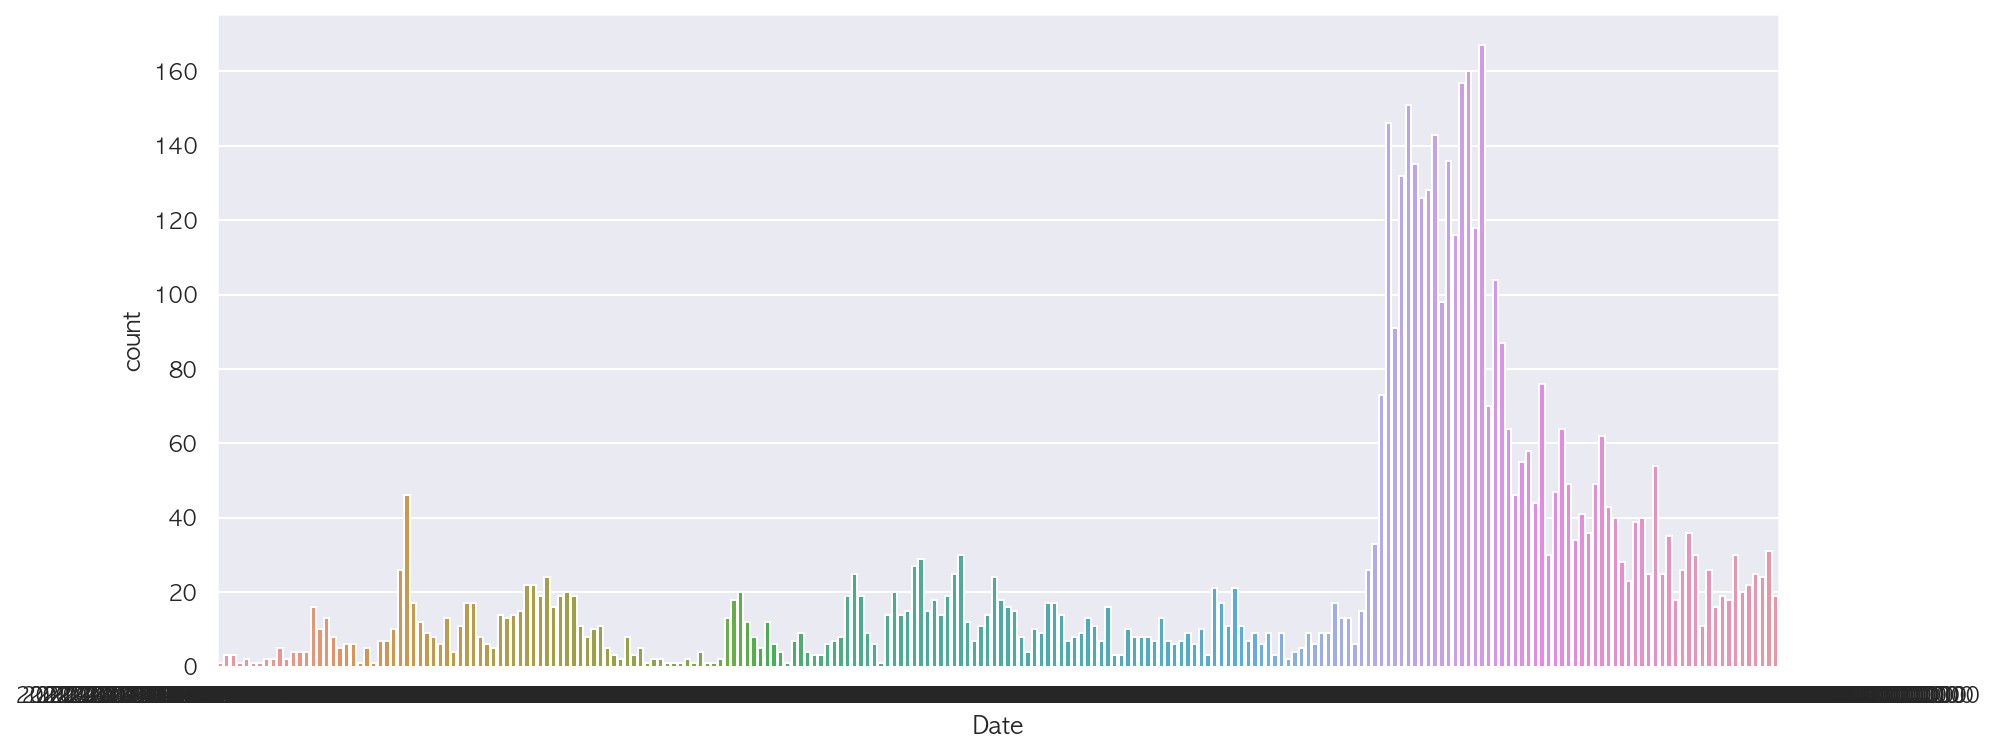

In [103]:
plt.figure(figsize=(14,6))
sns.countplot(data=df1,x='Date')

## 월별 확진자

이태원 클럽 집단감염 발생했던 5월보다도 6월이 누적 확진자 수가 많다.

이 때 계속된 거리두기로 느슨해지면서 카페도 가고, 놀러다니고 해서 꾸준히 적지않은 수의 확진자가 발생한 것으로 보인다.

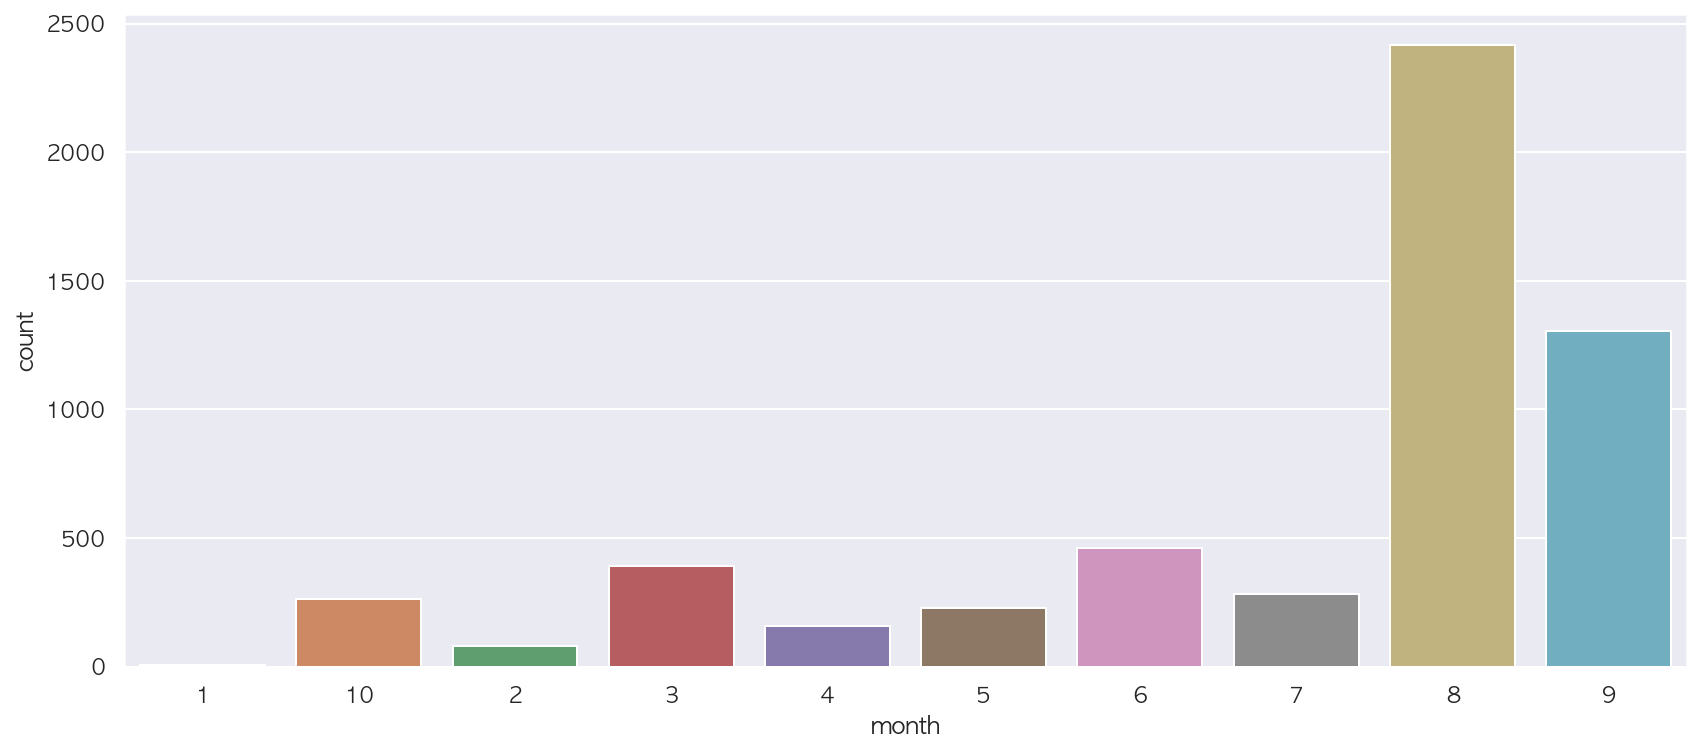

In [104]:
plt.figure(figsize=(14,6))
sns.countplot(data=df1,x='month')

## 구 별 누적 확진자 수

top3 관악구, 송파구, 성북구에서 사랑제일교회 관련 확진자가 많았을것으로 추측됨

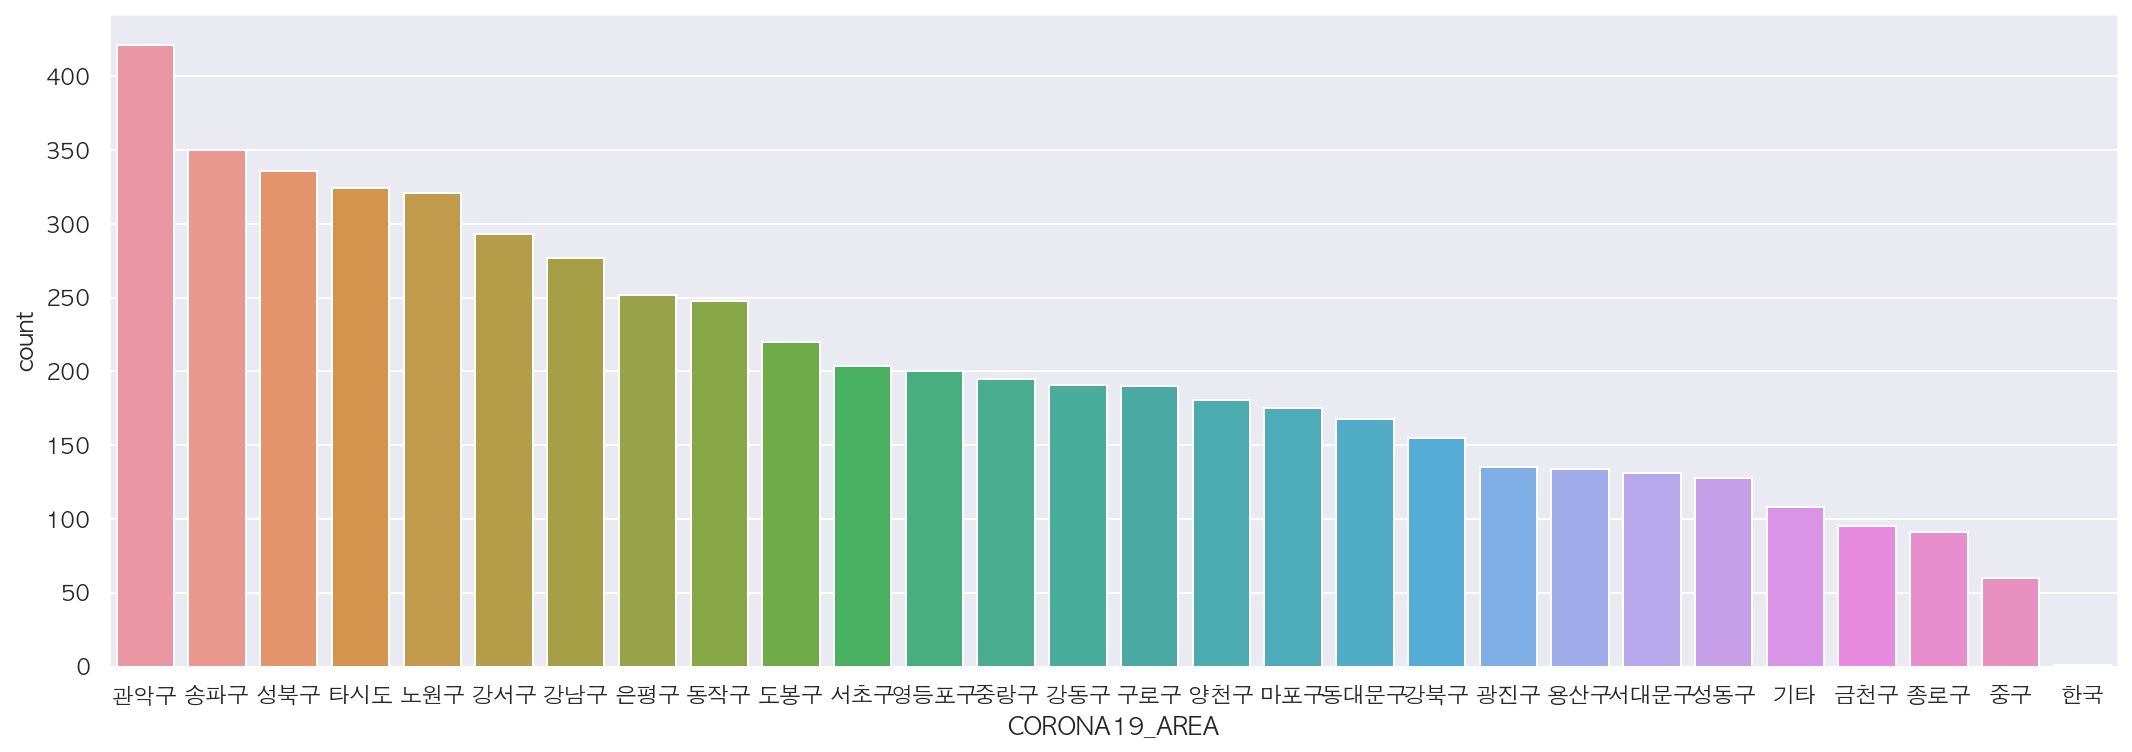

In [108]:
plt.figure(figsize=(18,6))
sns.countplot(data=df1,x='CORONA19_AREA', order = df1['CORONA19_AREA'].value_counts().index)

## 감염 경로 top 20

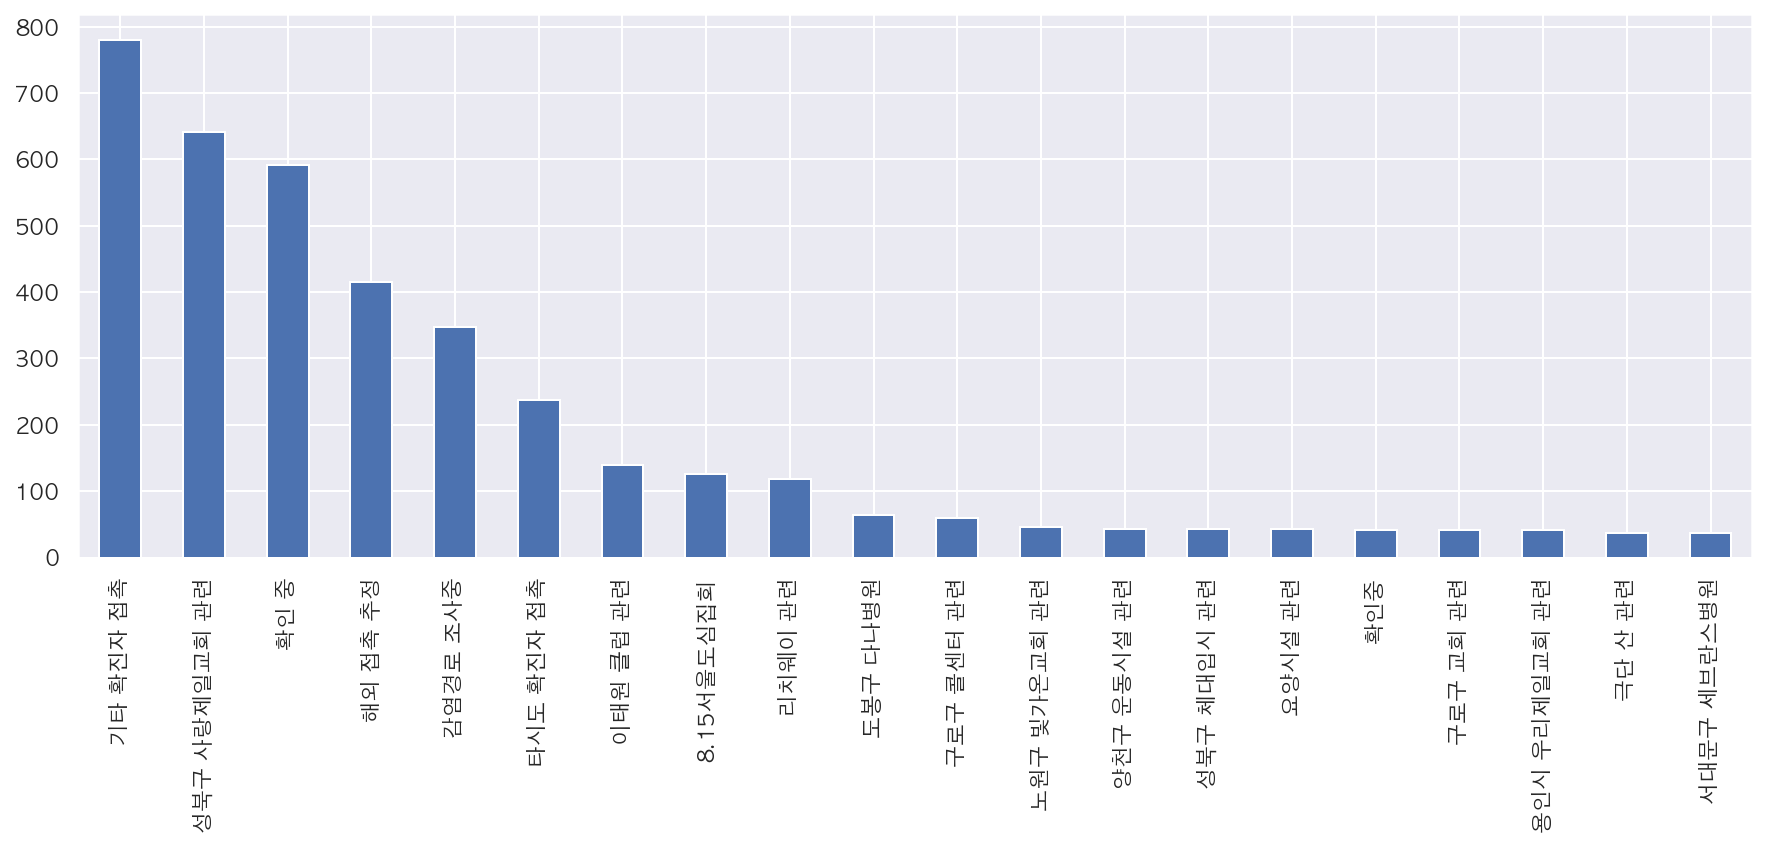

In [126]:
top20= df1['CORONA19_CONTACT_HISTORY'].value_counts(ascending=False).head(20)
top20.plot.bar(figsize=(15,5))